In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Youtube/USvideos.csv')
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [3]:
def cleanData(filePath, filePathJson):
    data = pd.read_csv(filePath)
    data['trending_date'] = '20' + data['trending_date']
    data['trending_date'] = pd.to_datetime(data['trending_date'],format='%Y.%d.%m')
    categories = pd.read_json(filePathJson)
    catData = json_normalize(categories['items'])
    idToCategories = pd.DataFrame(columns=['category_id', 'category'])
    idToCategories['category_id'] = catData['id']
    idToCategories['category'] = catData['snippet.title']
    idToCategories['category_id'] = idToCategories['category_id'].astype('int64')
    myData = pd.merge(data, idToCategories)
    myData = myData.drop(columns='category_id')
    myData['tags'] = myData.tags.str.strip().str.lower().str.replace('"','').str.replace('|',',')
    myData = myData.drop_duplicates()
    return myData


In [4]:
cleanData('../Data/Youtube/USvideos.csv', '../Data/Youtube/US_category_id.json')

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10T21:01:22.000Z,"bleacher report,br,nba,stan van gundy,jeff van...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10T21:01:22.000Z,"bleacher report,br,nba,stan van gundy,jeff van...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10T21:01:22.000Z,"bleacher report,br,nba,stan van gundy,jeff van...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10T21:01:22.000Z,"bleacher report,br,nba,stan van gundy,jeff van...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows


In [5]:
dates = []
for date in df['trending_date'].str.split('.'):
    dates.append(date[2] + "-" + date[1] + "-20" + date[0])
df['trending_date'] = dates
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,11-14-2017,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,11-14-2017,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,11-14-2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [9]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

# What are the most common words in trending video titles?

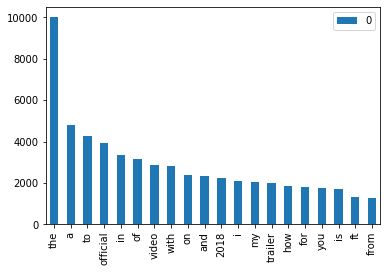

In [41]:
word_count = {}
for title in df['title']:
    title_formatted = title.lower()
    for word in title_formatted.split(' '):
        word = ''.join(e for e in word if e.isalnum())
        if word in word_count:
            word_count[word] = word_count[word] + 1
        else:
            word_count[word] = 1
df_counts = pd.DataFrame.from_dict(word_count, orient='index')
df_counts = df_counts.drop('')
df_counts.sort_values(by=[0],ascending=False).head(20).plot.bar()

# What are the most common tags in trending videos?

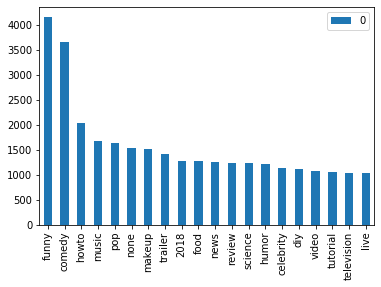

In [40]:
df['tags'] = df.tags.str.strip().str.lower().str.replace('"','').str.replace('|',',')
word_count = {}
for title in df['tags']:
    title_formatted = title.lower()
    for word in title_formatted.split(','):
        word = ''.join(e for e in word if e.isalnum())
        if word in word_count:
            word_count[word] = word_count[word] + 1
        else:
            word_count[word] = 1
df_counts = pd.DataFrame.from_dict(word_count, orient='index')
df_counts.sort_values(by=[0],ascending=False).head(20).plot.bar()

# Which channels have the most number of trending videos?

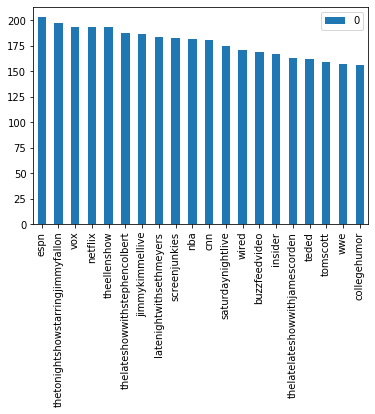

In [64]:
channel_count = {}
for title in df['channel_title']:
    channel_title = title.lower()
    channel_title = ''.join(e for e in channel_title if e.isalnum())
    if channel_title in channel_count:
        channel_count[channel_title] = channel_count[channel_title] + 1
    else:
        channel_count[channel_title] = 1
df_channel_counts = pd.DataFrame.from_dict(channel_count, orient='index')
df_channel_counts.sort_values(by=[0],ascending=False).head(20).plot.bar()

# What hour were the most trending videos published?

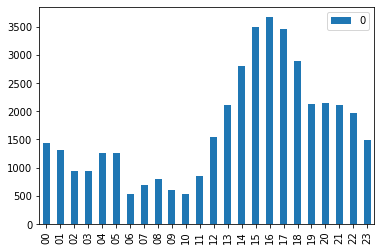

In [62]:
hour_count = {}
for time in df['publish_time']:
    hour = time.split('T')[1].split(':')[0]
    if hour in hour_count:
        hour_count[hour] = hour_count[hour] + 1
    else:
        hour_count[hour] = 1
df_hour_counts = pd.DataFrame.from_dict(hour_count, orient='index')
df_hour_counts.sort_index().plot.bar()